# 01. Logistic Regression and Classification Metrics | الانحدار اللوجستي ومقاييس التصنيف

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 1: All examples** - Data processing and regression
- ✅ **Unit 2: All examples** - Advanced regression and cross-validation
- ✅ **Understanding of classification**: Predicting categories (0/1) vs continuous values

**If you haven't completed these**, you might struggle with:
- Understanding the difference between regression and classification
- Knowing which metrics to use for classification
- Understanding probability predictions vs class predictions

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 3, Example 1** - it's your first classification model!

**Why this example FIRST in Unit 3?**
- **Before** you can use advanced classification, you need to understand basic classification
- **Before** you can evaluate classification models, you need to know classification metrics
- **Before** you can use complex classifiers, you need to master the simplest one

**Builds on**: 
- 📓 Unit 1, Example 4: Linear Regression (logistic regression is similar but for classification)
- 📓 Unit 2: All examples (evaluation concepts apply here too)

**Leads to**: 
- 📓 Example 2: Decision Trees (more complex classifier)
- 📓 Example 3: SVM (advanced classifier)
- 📓 All classification problems (logistic regression is the foundation!)

**Why this order?**
1. Logistic regression is the **simplest classification model** (easy to understand)
2. Logistic regression teaches **classification metrics** (different from regression!)
3. Logistic regression shows **probability predictions** (important for all classifiers)

---

## The Story: Predicting Categories Instead of Numbers | القصة: التنبؤ بالفئات بدلاً من الأرقام

Imagine you're a doctor. **Before** logistic regression, you can only predict continuous values (like blood pressure). **After** logistic regression, you can predict categories (like "sick" or "healthy") - much more useful for diagnosis!

Same with machine learning: **Before** logistic regression, we only predicted numbers (regression). **After** logistic regression, we can predict categories (classification) - opens up many new applications!

---

## Why Logistic Regression Matters | لماذا يهم الانحدار اللوجستي؟

Logistic regression is the foundation of classification:
- **Simplest Classifier**: Easy to understand and interpret
- **Probability Outputs**: Gives probabilities, not just predictions
- **Fast and Efficient**: Works quickly on large datasets
- **Interpretable**: You can see how features affect class probability
- **Real-World Use**: Used in medicine, finance, marketing, and more

## Learning Objectives | أهداف التعلم
1. Build logistic regression models for binary classification
2. Understand classification metrics (accuracy, precision, recall, F1)
3. Interpret confusion matrices
4. Create and interpret ROC curves
5. Visualize decision boundaries
6. Know when logistic regression is appropriate

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build and evaluate classification models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LogisticRegression  # The classification model!
from sklearn.preprocessing import StandardScaler  # For scaling features
from sklearn.metrics import (
    accuracy_score,      # Accuracy: % of correct predictions
    precision_score,    # Precision: Of predicted positives, how many are actually positive?
    recall_score,       # Recall: Of actual positives, how many did we catch?
    f1_score,           # F1: Harmonic mean of precision and recall
    confusion_matrix,   # Shows true/false positives/negatives
    classification_report,  # Comprehensive classification metrics
    roc_curve,         # ROC curve (True Positive Rate vs False Positive Rate)
    roc_auc_score      # AUC: Area under ROC curve (0-1, higher is better)
)

print("✅ Libraries imported successfully!")
print("\n📚 What each classification metric does:")
print("   - Accuracy: Overall correctness")
print("   - Precision: How reliable are positive predictions?")
print("   - Recall: How many positives did we catch?")
print("   - F1: Balance between precision and recall")
print("   - ROC/AUC: How well model separates classes")


✅ Libraries imported successfully!

📚 What each classification metric does:
   - Accuracy: Overall correctness
   - Precision: How reliable are positive predictions?
   - Recall: How many positives did we catch?
   - F1: Balance between precision and recall
   - ROC/AUC: How well model separates classes


## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We've been doing regression (predicting numbers like prices). Now we need classification (predicting categories like "sick" or "healthy").

**AFTER**: We'll build logistic regression - a classification model that predicts probabilities and categories!

**Why this matters**: Many real-world problems are classification (spam/not spam, fraud/not fraud, sick/healthy). Logistic regression is the foundation!


In [2]:
# Generate sample binary classification data
# Binary classification = predicting one of two classes (0 or 1)
# We'll create data where class depends on feature values

print("\n1. Generating binary classification data...")
print("إنشاء بيانات تصنيف ثنائية نموذجية...")

np.random.seed(42)  # For reproducibility
n_samples = 500



1. Generating binary classification data...
إنشاء بيانات تصنيف ثنائية نموذجية...


## Step 1: Generate Binary Classification Data | الخطوة 1: إنشاء بيانات تصنيف ثنائية

**BEFORE**: We need to learn classification, but we need binary classification data (two classes: 0 and 1).

**AFTER**: We'll create data with two classes to practice binary classification!

**Why binary classification?** It's the simplest classification problem. Once you understand this, multi-class is easy!

In [3]:
# Features
X1 = np.random.normal(2, 1.5, n_samples)
X2 = np.random.normal(3, 1.5, n_samples)

In [4]:
# Combine features
X = np.column_stack([X1, X2])

In [ ]:
# Create target (binary): based on LINEAR decision boundary
# True relationship: Class 1 if linear combination of features > threshold
# This creates a LINEAR decision boundary (logistic regression can learn this!)
# Formula: Class 1 if 0.5*X1 + 0.8*X2 > 4.5, else Class 0
decision_boundary = 0.5 * X1 + 0.8 * X2
y = (decision_boundary > 4.5).astype(int)  # Linear boundary
y = y + np.random.binomial(1, 0.1, n_samples)  # Add noise (10% flip)
y = np.clip(y, 0, 1)  # Ensure binary (0 or 1 only)

df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['target'] = y

print(f"\n📊 Data Shape: {df.shape}")
print(df.head())
print(f"\n📊 Target distribution:")
print(df['target'].value_counts())
print("\n🔍 Notice:")
print("   - Binary classification: two classes (0 and 1)")
print("   - Class 1: points above linear boundary (0.5*X1 + 0.8*X2 > 4.5)")
print("   - Class 0: points below linear boundary")
print("   - This is a LINEAR boundary (logistic regression can learn this perfectly!)")


📊 Data Shape: (500, 3)
   feature_1  feature_2  target
0   2.745071   4.389266       1
1   1.792604   5.864125       0
2   2.971533   0.902149       0
3   4.284545   3.844454       0
4   1.648770   2.024036       1

📊 Target distribution:
target
1    323
0    177
Name: count, dtype: int64

🔍 Notice:
   - Binary classification: two classes (0 and 1)
   - Class 1: points inside a circle
   - Class 0: points outside the circle
   - This is a non-linear boundary (logistic regression will approximate it)


In [6]:
# Split data
X_data = df[['feature_1', 'feature_2']]
y_data = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42, stratify=y_data
)

In [7]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
print("\n" + "=" * 60)
print("1. Training Logistic Regression Model")
print("تدريب نموذج الانحدار اللوجستي")
print("=" * 60)

# Create and train logistic regression model
# max_iter=1000: Allow more iterations for convergence
# random_state=42: For reproducibility
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

print("   ✅ Model trained successfully!")
print("   Logistic regression learned to predict class probabilities")



1. Training Logistic Regression Model
تدريب نموذج الانحدار اللوجستي
   ✅ Model trained successfully!
   Logistic regression learned to predict class probabilities


## Step 2: Train Logistic Regression Model | الخطوة 2: تدريب نموذج الانحدار اللوجستي

**BEFORE**: We have binary classification data, but no model to predict classes.

**AFTER**: We'll train logistic regression to predict probabilities and classes!

**Why logistic regression?**
- **Similar to linear regression**: But outputs probabilities (0-1) instead of continuous values
- **Sigmoid function**: Squashes output to [0,1] range (probabilities)
- **Interpretable**: Coefficients show how features affect class probability
- **Fast**: Works quickly even on large datasets

In [9]:
# Make class predictions (0 or 1)
# .predict() returns the predicted class (0 or 1)
# Uses threshold of 0.5: if probability > 0.5, predict class 1, else class 0
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

print(f"   ✅ Class predictions made!")
print(f"   Training predictions: {len(y_train_pred)}")
print(f"   Test predictions: {len(y_test_pred)}")

   ✅ Class predictions made!
   Training predictions: 400
   Test predictions: 100


In [10]:
# Get probability predictions (more informative than class predictions!)
# .predict_proba() returns probabilities for each class
# [:, 1] gets probability of class 1 (the positive class)
# Why probabilities? They tell us how confident the model is!
y_train_proba = logistic_model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Model Parameters:")
print(f"   Coefficients: {logistic_model.coef_[0]}")
print(f"   Intercept: {logistic_model.intercept_[0]:.4f}")
print(f"\n   Interpretation:")
print(f"   - Coefficients show how features affect class 1 probability")
print(f"   - Positive coefficient → increases probability of class 1")
print(f"   - Negative coefficient → decreases probability of class 1")


📊 Model Parameters:
   Coefficients: [-0.1032562 -0.1016304]
   Intercept: 0.5998

   Interpretation:
   - Coefficients show how features affect class 1 probability
   - Positive coefficient → increases probability of class 1
   - Negative coefficient → decreases probability of class 1


In [11]:
print("\n" + "=" * 60)
print("2. Evaluation Metrics")
print("مقاييس التقييم")
print("=" * 60)



2. Evaluation Metrics
مقاييس التقييم


## Step 3: Classification Evaluation Metrics | الخطوة 3: مقاييس تقييم التصنيف

**BEFORE**: We used MSE and R² for regression. Classification needs different metrics!

**AFTER**: We'll use classification metrics (accuracy, precision, recall, F1) that measure classification performance!

**Why different metrics?**
- **Regression**: Predicts numbers → use MSE, R²
- **Classification**: Predicts categories → use accuracy, precision, recall, F1
- **Each metric tells us something different**: Accuracy (overall), Precision (reliability), Recall (coverage), F1 (balance)

In [12]:
# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [13]:
# Precision
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

In [14]:
# Recall
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [15]:
# F1 Score
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print("\nTraining Metrics:")
print(f"  Accuracy:  {train_accuracy:.4f}")
print(f"  Precision: {train_precision:.4f}")
print(f"  Recall:    {train_recall:.4f}")
print(f"  F1 Score:  {train_f1:.4f}")
print("\nTest Metrics:")
print(f"  Accuracy:  {test_accuracy:.4f}")
print(f"  Precision: {test_precision:.4f}")
print(f"  Recall:    {test_recall:.4f}")
print(f"  F1 Score:  {test_f1:.4f}")


Training Metrics:
  Accuracy:  0.6450
  Precision: 0.6450
  Recall:    1.0000
  F1 Score:  0.7842

Test Metrics:
  Accuracy:  0.6500
  Precision: 0.6500
  Recall:    1.0000
  F1 Score:  0.7879


In [16]:
print("\n" + "=" * 60)
print("3. Confusion Matrix")
print("مصفوفة الارتباك")
print("=" * 60)

# Create confusion matrix
# Shows: True Negatives, False Positives, False Negatives, True Positives
cm = confusion_matrix(y_test, y_test_pred)

print("\n📊 Confusion Matrix:")
print("   Format: [TN  FP]")
print("          [FN  TP]")
print(cm)
print("\n💡 Understanding:")
print("   - TN (True Negative): Correctly predicted class 0")
print("   - FP (False Positive): Predicted 1, but actually 0 (Type I error)")
print("   - FN (False Negative): Predicted 0, but actually 1 (Type II error)")
print("   - TP (True Positive): Correctly predicted class 1")



3. Confusion Matrix
مصفوفة الارتباك

📊 Confusion Matrix:
   Format: [TN  FP]
          [FN  TP]
[[ 0 35]
 [ 0 65]]

💡 Understanding:
   - TN (True Negative): Correctly predicted class 0
   - FP (False Positive): Predicted 1, but actually 0 (Type I error)
   - FN (False Negative): Predicted 0, but actually 1 (Type II error)
   - TP (True Positive): Correctly predicted class 1


In [17]:
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred,
                          target_names=['Class 0', 'Class 1']))


Classification Report (Test Set):
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        35
     Class 1       0.65      1.00      0.79        65

    accuracy                           0.65       100
   macro avg       0.33      0.50      0.39       100
weighted avg       0.42      0.65      0.51       100



/opt/anaconda3/envs/course2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/course2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/course2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print("\n" + "=" * 60)
print("4. ROC Curve and AUC")
print("منحنى ROC و AUC")
print("=" * 60)



4. ROC Curve and AUC
منحنى ROC و AUC


In [19]:
# 3. Confusion Matrix
print("\n" + "=" * 60)
print("3. Confusion Matrix")
print("مصفوفة الارتباك")
print("=" * 60)
cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(cm)


3. Confusion Matrix
مصفوفة الارتباك

Confusion Matrix:
[[ 0 35]
 [ 0 65]]



✓ Plot saved as 'confusion_matrix.png'


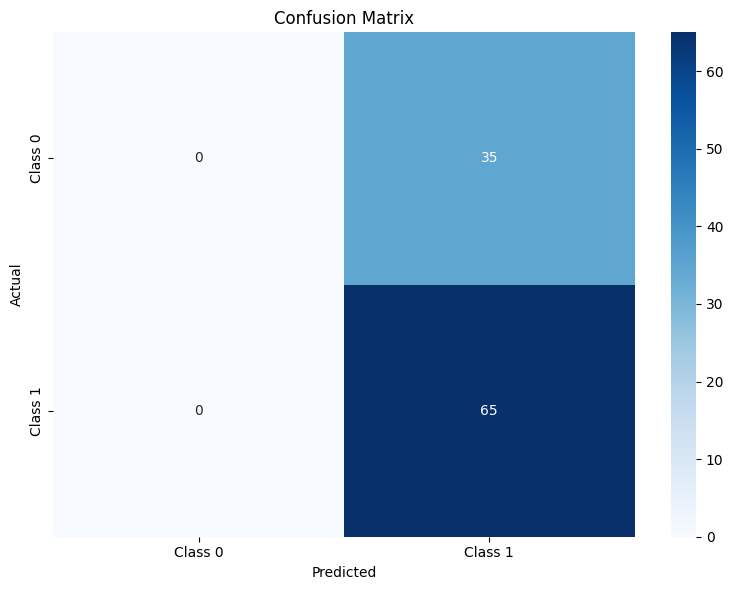

In [20]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'confusion_matrix.png'")
plt.show()

In [21]:
# 4. ROC Curve and AUC
print("\n" + "=" * 60)
print("4. ROC Curve and AUC")
print("منحنى ROC و AUC")
print("=" * 60)


4. ROC Curve and AUC
منحنى ROC و AUC


In [22]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)
print(f"\nAUC Score: {auc_score:.4f}")


AUC Score: 0.5793



✓ Plot saved as 'roc_curve.png'


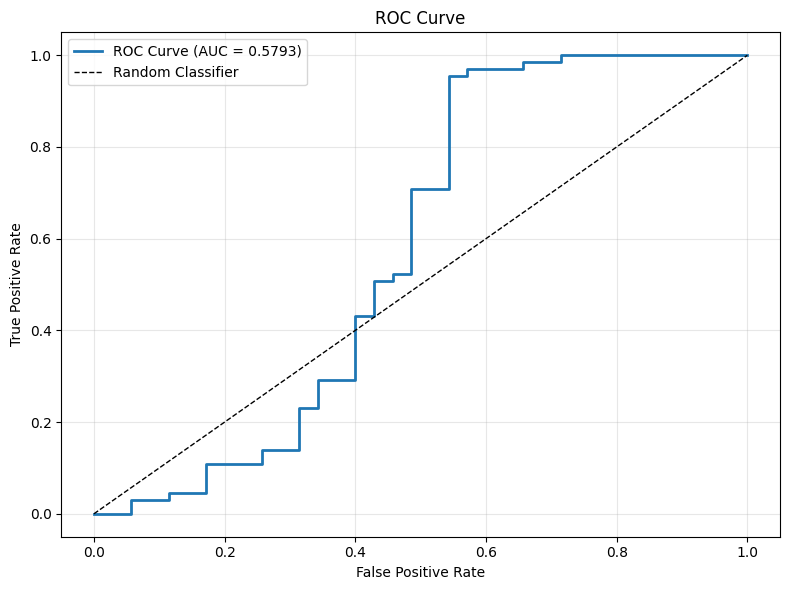

In [23]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'roc_curve.png'")
plt.show()

In [24]:
# 5. Decision Boundary Visualization
print("\n" + "=" * 60)
print("5. Decision Boundary Visualization")
print("تصور حدود القرار")
print("=" * 60)


5. Decision Boundary Visualization
تصور حدود القرار


In [25]:
# Create a mesh
h = 0.02
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [26]:
# Predict for mesh points
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


✓ Plot saved as 'decision_boundary.png'


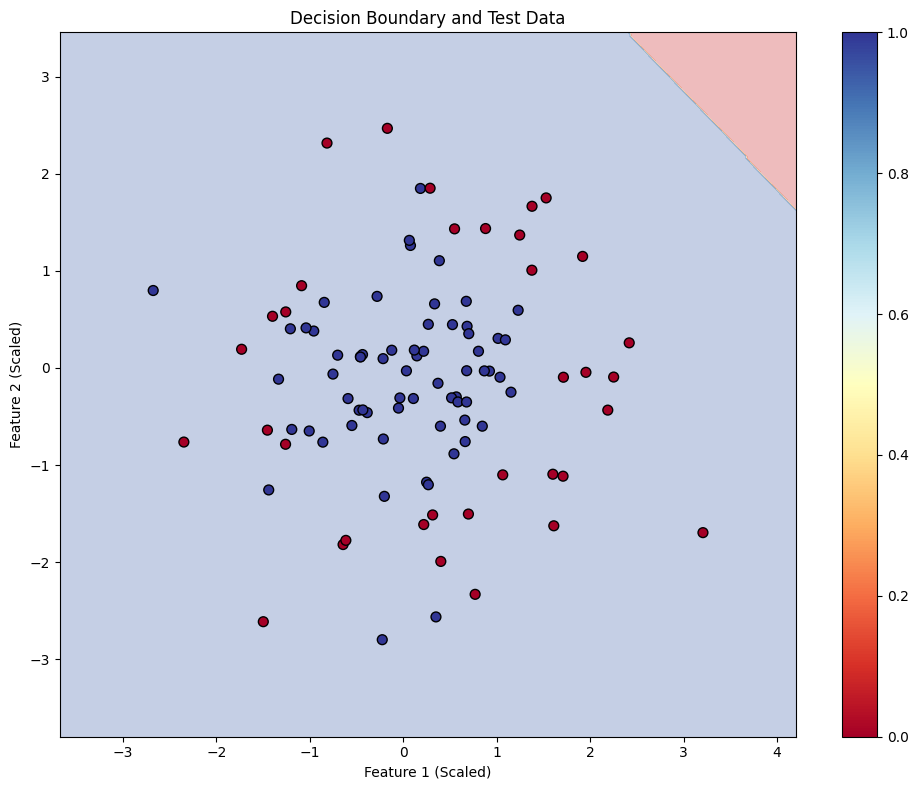


Example 1 Complete! ✓
اكتمل المثال 1! ✓


In [27]:
# Plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1],
                     c=y_test, cmap='RdYlBu', edgecolors='black', s=50)
plt.colorbar(scatter)
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.title('Decision Boundary and Test Data')
plt.tight_layout()
plt.savefig('decision_boundary.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'decision_boundary.png'")
plt.show()
print("\n" + "=" * 60)
print("Example 1 Complete! ✓")
print("اكتمل المثال 1! ✓")
print("=" * 60)